# Preprocessing Data

***


![XKCD Comic 2054](https://imgs.xkcd.com/comics/data_pipeline.png)

***


Preparing data in an appropriate and transparent way is possibly the most important part of data analysis.

Indeed, once the data are prepared the rest of the analysis is largely automated.

In Python, we usually use different parts of scikit-learn to preprocess data.

***


<br>

## Imports


***

The preprocessing subpackage contains much of the preprocessing functionality of scikit-learn:

[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)

We'll also touch on the use of the decomposition subpackage.

For demonstrations, we'll use the model_selection sub-package, pandas, numpy, and seaborn. 

***

In [1]:
# Method for preprocessing.
import sklearn.preprocessing as pre

# Whitening.
import sklearn.decomposition as dec


# Training and testing.
import sklearn.model_selection as mod

# Data frames.
import pandas as pd

# Numerical arrays and algorithms.
import numpy as np

# Advanced plotting.
import seaborn as sns

<br>

## Data set

***

As usual, we'll use the Irish data set as an example.

Generally this data set is used to demonstrate classification.

The four numeric variables are typically as inputs.

The categorical species variable is typically the targeted output.

***

In [2]:
# Load the Iris data set using pandas.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")

# Have a look at it.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Separate the input variables/columns from the data set.
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Have a look at them.
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Outputs - notice the inner brackets to get a Data Frame rather than Data Series.
y = df[['species']]

<br>

## Tidying

***

The iris data set is fairly clean- unlike many real-world data sets, it doesn't require any re-formatting or re-jigging.

You might need to manually manipulate data sets or clean them using regular expressions but we won't cover that here.

Rather, we'll focus on the preprocessing that typically might happen once the dataset is in columns.

***

<br>

## Splitting

***

For supervised learning, we typically split our data set into a training set and a testing set.

The training set is used to train the model.

The test set is then used to test the model.

***

In [5]:
# Split into training and testing sets.
X_train, X_test, y_train, y_test = mod.train_test_split(X, y)

<br>

## Training a Scaler

***

A standard pre-processing technique is to subtract, from each of the numerical columns, the mean of that column.

Then we divide by the column's standard deviation.

We do this to give each of the variables an equal chance to contribute in circumstances where the magnitude of the values might matter.

Ideally, machine learning algorithms wouldn't perform differently whether a given column is in millimetres or metres, for example.

In practice, some algorithms will, particularly if there are large differences between the typically size/magnitude of the values in different columns.

Thus we scale the columns to all have similar magnitudes with their values looking more like a standard normal distribution.

Note that the fact that scaling is common gives us some insight into what typically matters in machine learning.

It's the way the values change within a column and between the columns that usually matters - not the values themselves.

<br>

Obviously, we have to keep track of the scaling operation, so that we can apply it to future data points and also undo the scaling if needed.

This functionality is provided by the preprocessing package.

By training the scaler, all we really mean is that we give the scaler the data set and it calculates and remembers the mean and standard deviation.

***


In [6]:
# Create a new scaler using the preprocessing package.
scaler = pre.StandardScaler()

# Train the scaler on X_train.
scaler.fit(X_train)

StandardScaler()

In [7]:
# See the mean and standard deviation of each column from the scaler.
scaler.mean_, scaler.scale_

(array([5.82857143, 3.05982143, 3.78928571, 1.20892857]),
 array([0.84825752, 0.41693178, 1.76287899, 0.76596736]))

<br>

## Scaling Training Data

***


Note that we train the scaler on the training data set.

In supervised machine learning, we pretend that the training data is all we have.

Therefore, it wouldn't be fair to use the whole data set to train the scaler.

Once the scaler is trained on the data, we can use it to transform data.

Obviously, the first data set to transform is the training data set itself.

<br>

Note that, while scikit-learn algorithms will usually let you pass in pandas data frames, they will often return numpy arrays.

Thus, we often have to re-create a pandas data frame from the returned numpy array.

***

In [8]:
# Transform the training data.
X_train_scaled = scaler.transform(X_train)

# Turn numpy array back into Data Frame.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# View.
X_train_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,-0.741015,2.494841,-1.298606,-1.447749
1,-0.623126,1.535452,-1.298606,-1.317195
2,-1.448347,1.295604,-1.582233,-1.317195
3,0.673650,0.336215,0.403155,0.380005
4,-1.566236,-1.822412,-1.412057,-1.186641
...,...,...,...,...
107,-0.269460,-0.143480,0.403155,0.380005
108,-0.505237,-0.143480,0.403155,0.380005
109,1.145205,-0.623175,0.573332,0.249451
110,-0.858904,1.535452,-1.298606,-1.056088


In [9]:
# The mean of each columns is now zero and standard deviation is one.
X_train_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,2.934161e-16,2.061843e-16,-1.823938e-16,-2.061843e-16
std,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00
min,-1.802013e+00,-2.541954e+00,-1.582233e+00,-1.447749e+00
25%,-8.589036e-01,-6.231749e-01,-1.241881e+00,-1.186641e+00
50%,-1.515712e-01,-1.434801e-01,3.464301e-01,1.841742e-01
75%,7.031221e-01,5.760620e-01,7.435078e-01,7.716666e-01
max,2.441981e+00,2.734689e+00,1.651114e+00,1.685544e+00


In [10]:
# Note the weird numbers are just floating point artifacts.
X_train_scaled.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,112.00,112.00,112.00,112.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.80,-2.54,-1.58,-1.45
25%,-0.86,-0.62,-1.24,-1.19
50%,-0.15,-0.14,0.35,0.18
75%,0.70,0.58,0.74,0.77
max,2.44,2.73,1.65,1.69


In [11]:
# Note the original means and standard deviations.
X_train.describe()

# An astute observer might notice the values here are slightly different from those calculated by the scaler.
# I think that might be rounding error due to the scaler actually focusing on the variance, which should also be 1.

,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000
mean,5.828571,3.059821,3.789286,1.208929
std,0.852070,0.418806,1.770802,0.769410
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.400000,1.350000
75%,6.425000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.700000,2.500000


<br>

## Scaling Other Data

***

We scaled our data to train whatever model we are using.

The idea is then that that model can be used on the test data set.

Of course, we need to use the scaler on the test data set too before inputting it into our model.

Note the difference here - the scaler is trained on the test data, but here we're applying it to the test data.

<br>

FYI, you can use scikit-learn pipelines to join different transforms and algorithms to be used together:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

***

In [12]:
# Note the scaler was trained on X_train.
X_test_scaled = scaler.transform(X_test)

# Numpy array back to Data Frame.
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Have a look.
X_test_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,1.027316,0.096367,1.027135,1.554990
1,-0.741015,0.815909,-1.355332,-1.317195
2,-0.033682,-0.863022,0.176254,-0.272764
3,-0.151571,3.214383,-1.298606,-1.056088
4,-0.505237,2.015146,-1.412057,-1.056088


In [13]:
# Descriptives - why aren't the means all 0 and the standard deviations all 1?
X_test_scaled.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,38.00,38.00,38.00,38.00
mean,0.07,-0.06,-0.07,-0.05
std,0.90,1.15,1.00,0.98
min,-1.68,-1.82,-1.47,-1.45
25%,-0.51,-0.80,-1.30,-1.06
50%,0.08,-0.14,0.29,0.12
75%,0.67,0.34,0.63,0.77
max,2.21,3.21,1.76,1.55


<br>

## Inverse scaling

***

Sometimes we'll need to reverse the scaling process - although not generally.

***

In [14]:
# Reversing the transform, if needed.
scaler.inverse_transform(X_train_scaled[:5])

array([[5.2, 4.1, 1.5, 0.1],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [4.5, 2.3, 1.3, 0.3]])

In [15]:
# Verify the inverse transform gives us the original.
# Note that sometimes you'll see false because these are floats.
(scaler.inverse_transform(X_train_scaled) == X_train).head()

,sepal_length,sepal_width,petal_length,petal_width
32,True,True,True,False
48,True,True,True,False
22,True,True,True,False
51,True,True,True,True
41,True,True,False,False


<br>

## Why scale?

***

To get some insight into scaling, we can compare a data set to its scaled form.

Here we scale the whole data set.

Note the pairplots are the same, except for the values on the axes.

***

In [16]:
# Train a new scaler on X, as opposed to X_train.
scaler = pre.StandardScaler()
scaler.fit(X);

In [17]:
# Transform X using the scaler.
X_scaled = scaler.transform(X)

# Turn back into a Data Frame.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

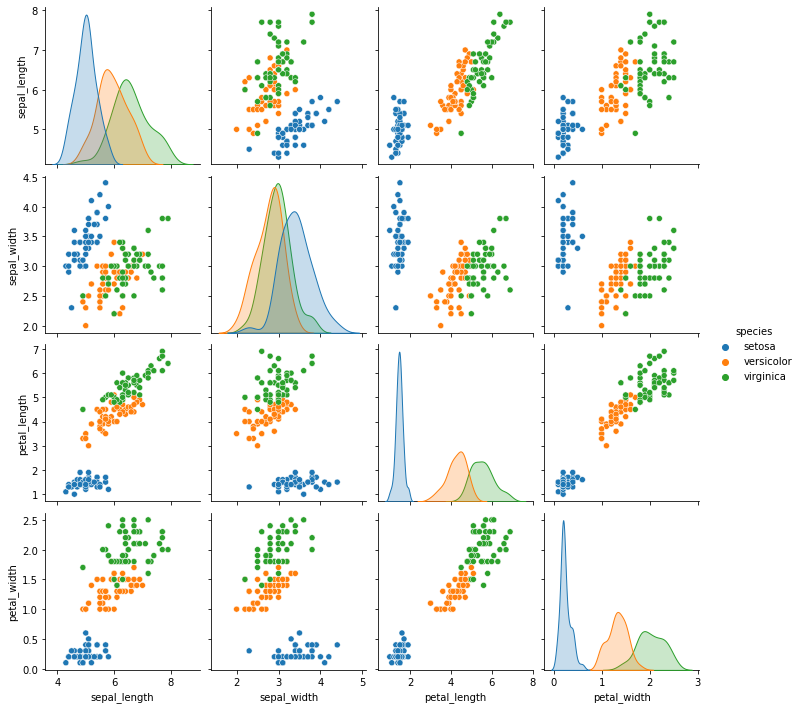

In [18]:
# Plot the original data set.
sns.pairplot(df, hue='species');

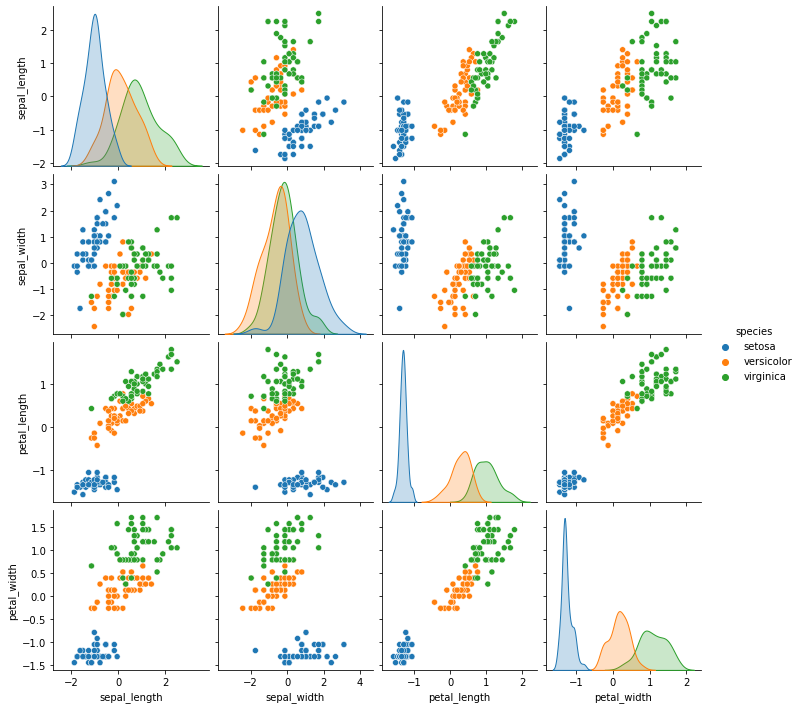

In [19]:
# Plot the scaled data set.
sns.pairplot(pd.concat([X_scaled, y], axis=1), hue='species');

<br>

## Whitening

***

The documentation for some algorithms will suggest whitening your data.

Whitening generally involves removing any apparent correlations between the variables.

The Pearson correlation coefficient is generally used to measure the correlation between variables.

A value of 1 means perfect correlation, 0 means no correlation, and -1 means inverse correlation (the variables are perfectly correlated but when one goes up the other goes down).

***

In [20]:
# Pearson correlation coefficient for variables in X.
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<br>

## Principle Component Analysis

***

A technique called PCA can be used to remove these correlations.

Generally, PCA is used to reduce the number of variables in a data set.

The idea is to create a list of new variables using a series of linear transformations of the original variables.

The first of these new variables captures as much of the variation from the original variables as possible.

The second, uncorrelated to the first, captures as much of the remaining variation as possible, and so on.

Once the new variables have been created, the last few in the list, in some sense, capture less about the data set than the others and are sometimes discarded.

<br>

In whitening, PCA is used but no variables are discarded.

Thus, in the iris data set, the process just involves creating four new variables from the original four input variables such that the new ones are uncorrelated but still capture the essence of the data set.

***

In [21]:
# Principal component analysis.
# Note the whiten=True, I think that's a confusingly named parameter. It actually scales the data for us.
pca = dec.PCA(n_components=4, whiten=False)

# Fit X to pca.
pca.fit(X);

In [22]:
# Whiten X using pca.
X_white = pd.DataFrame(pca.transform(X), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

# View
X_white

,PCA1,PCA2,PCA3,PCA4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


In [23]:
# Correlation coefficients after whitening.
X_white.corr().round()

,PCA1,PCA2,PCA3,PCA4
PCA1,1.0,-0.0,0.0,-0.0
PCA2,-0.0,1.0,0.0,-0.0
PCA3,0.0,0.0,1.0,0.0
PCA4,-0.0,-0.0,0.0,1.0


In [24]:
# Descriptives.
X_white.describe().round(2)

,PCA1,PCA2,PCA3,PCA4
count,150.00,150.00,150.00,150.00
mean,0.00,-0.00,0.00,-0.00
std,2.06,0.49,0.28,0.15
min,-3.23,-1.26,-0.69,-0.50
25%,-2.53,-0.32,-0.20,-0.08
50%,0.55,-0.03,0.02,-0.00
75%,1.55,0.33,0.18,0.09
max,3.79,1.37,0.76,0.50


<br>

## Whitened Data versus the Original

***

Below we compare the original data set to its whitened form.

Notice how the first variable has good separation between species.

***

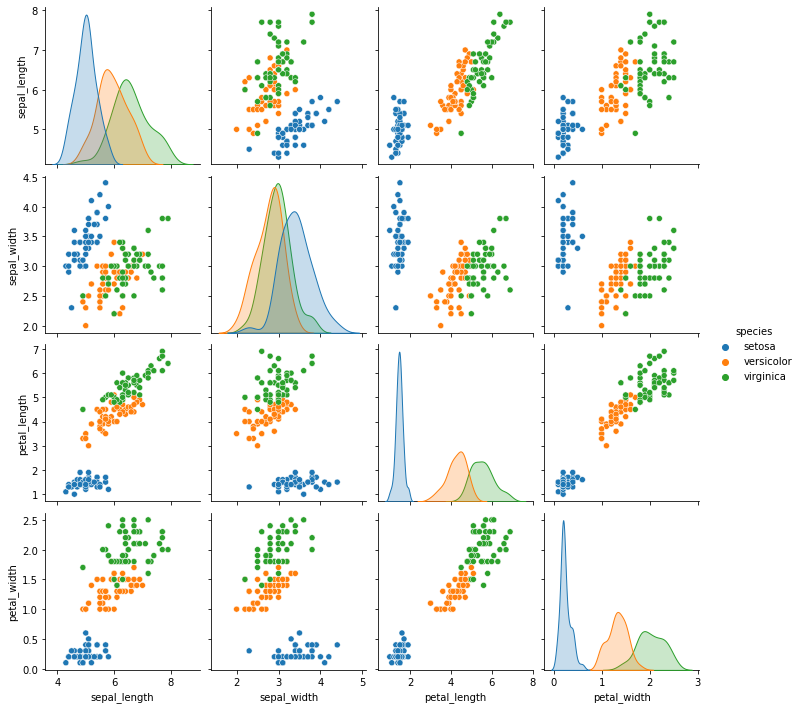

In [25]:
# Original Iris data set.
sns.pairplot(df, hue='species');

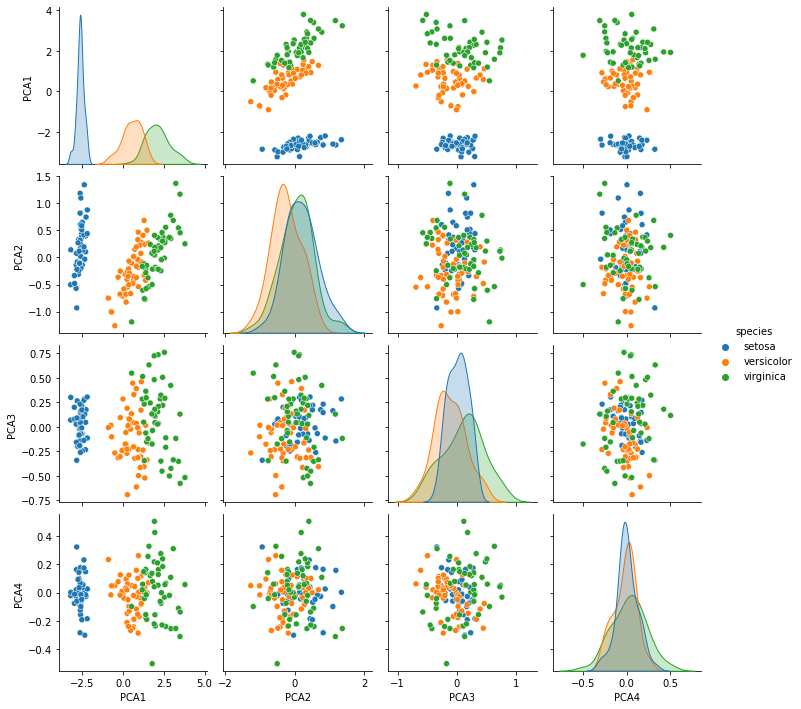

In [26]:
# Whitened Iris data set.
sns.pairplot(pd.concat([X_white, y], axis=1), hue='species');

<br>

## Output values

***

While scaling is a common preprocessing step on numerical inputs, one hot encoding is a typical transformation on categorical output variables.

The idea is simple: represent each possible category by a binary string/list with all entries except one as zero.

Obviously, the one is placed in a different position for each category.

***

In [27]:
# Create a new encoder.
encoder = pre.OneHotEncoder()

# Train the encoder on the data set.
encoder.fit(y_train)

OneHotEncoder()

In [28]:
# Transform the data.
yencoded = encoder.transform(y_train)
yencoded.toarray()[::10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
# Reversing the encoding.
encoder.inverse_transform(yencoded[:10])

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['virginica'],
       ['virginica'],
       ['setosa']], dtype=object)

***

All the encoder does is take a list of unique values from the categorical variable.

It's important to ensure that each possible category appears at least once in the training data.


***

## End